In [6]:
### EXECUTE ESSA CÉLULA PARA IMPORTAR AS BILBIOTECAS NECESSÁRIAS ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from funcoes_auxiliares import demonstracao_pca, DBSCAN_Clusters

## Preparação dos dados

__1)__ Os dados dos consumidores estão no arquivo `customers.csv`. Carregue os dados na variável `df` utilizando o método de pandas que lê arquivos csv e retorna um dataframe. Pesquise na documentação do Pandas se necessário.

In [110]:
df = pd.read_csv('../_datasets/customers.csv') ### CARREGUE OS DADOS ###
df.drop(['Regiao', 'Canal'], axis = 1, inplace = True)
df.head()

,Frescos,Laticinios,Doces,Congelados,Limpeza,Padaria
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


__2)__ Use o método `hist` de dataframes para gerar o histograma das variáveis para analisar a distribuição dos dados.

Passe como argumento da função: `figsize=(15,10)` e `bins=15`

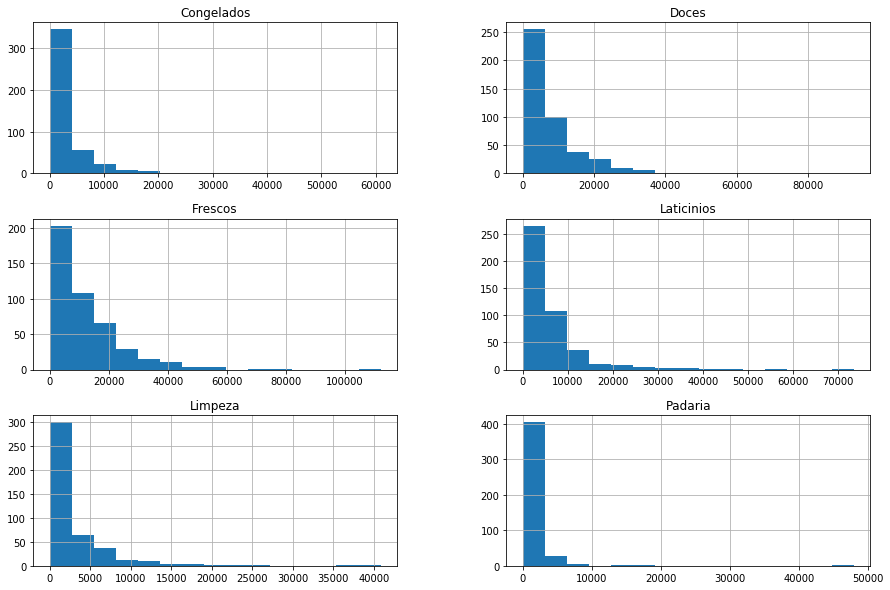

In [111]:
graph = df.hist(figsize=(15,10), bins=15) ### CHAME O HISTOGRAMA ###

Outra visualização muito interessante é utilizando uma matriz de dispersão

__3)__ Use a função `pandas.plotting.scatter_matrix` para gerar uma matriz contendo gráficos de dispersão entre as variáveis.

Passe como argumento o dataframe,  `alpha=1`, `figsize=(17,10)` e `diagonal='kde'`

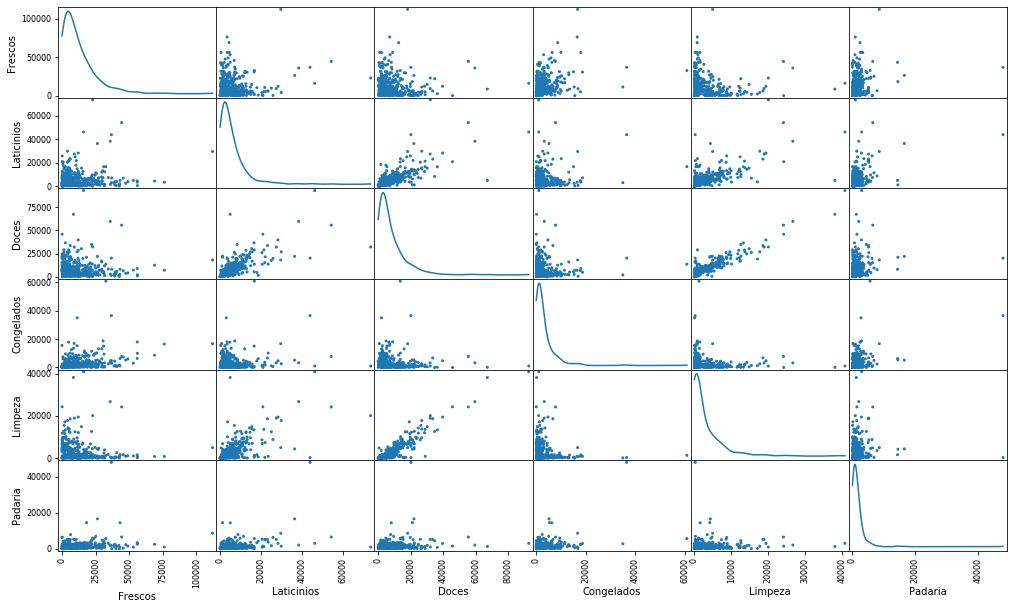

In [112]:
graph = pd.plotting.scatter_matrix(df, alpha=1, figsize=(17,10), diagonal='kde') ### CHAME A MATRIZ ###

Os dados seguem o que na literatura academica é bastante chamado de __skewed distribution__, como se fosse uma distribuição eviesada. Todas as variáveis tendem a essa distribuição e, dependendo da aplicação, isso pode não ser um problema, mas no nosso caso, onde iremos aplicar PCA e depois clusterização, é interessante aplicar uma __transformação logarítmica__ para distribuir os dados em uma distribuição normal.

__4)__ Use a função `numpy.log` para fazer a log transformação de `df` e atribua a variável `df_log`

In [113]:
df_log = np.log(df) ### CHAME A FUNÇÃO ###
df_log.head()

,Frescos,Laticinios,Doces,Congelados,Limpeza,Padaria
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


__5)__ Use novamente o histograma e a scatter matrix para verificar a distribuição dos dados após a transformação logarítmica 

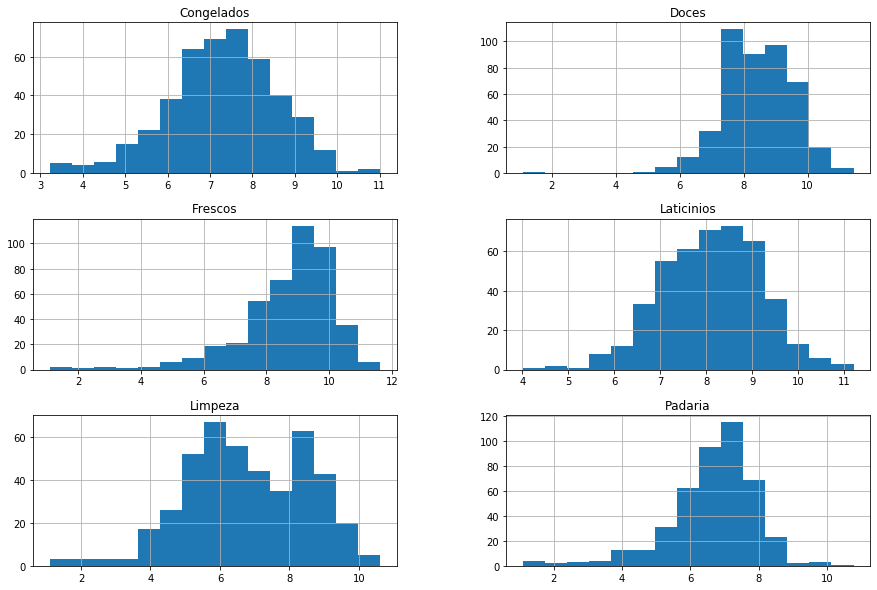

In [114]:
#graph = ### CHAME O HISTOGRAMA NOS DADOS DE LOG ###
graph = df_log.hist(figsize=(15,10), bins=15) ### CHAME O HISTOGRAMA ###

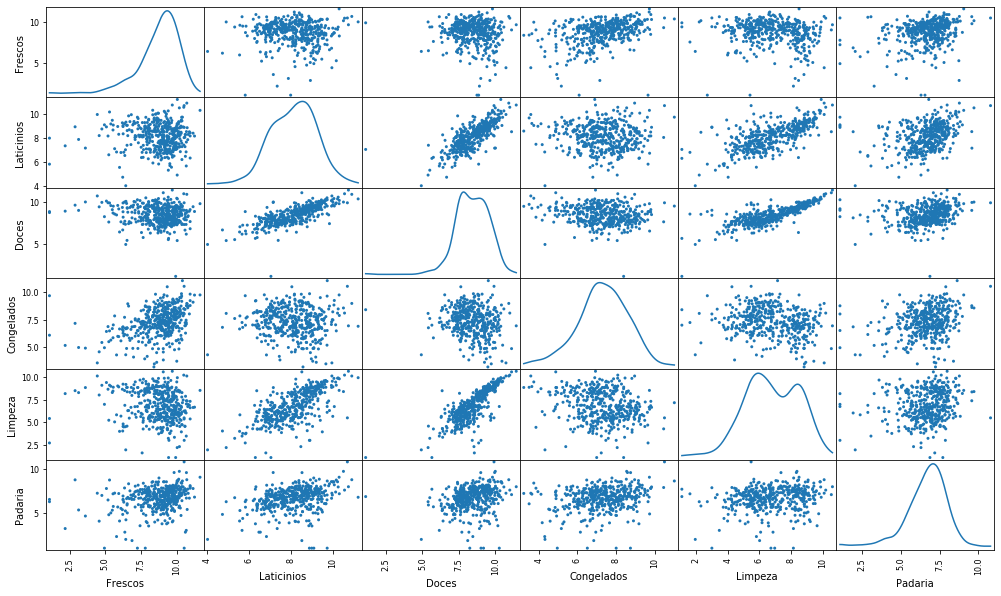

In [115]:
#graph = ### CHAME A MATRIZ NOS DADOS DE LOG ###
graph = pd.plotting.scatter_matrix(df_log, alpha=1, figsize=(17,10), diagonal='kde') ### CHAME A MATRIZ ###

## PCA

__6)__ Usando a função `demonstracao_pca` que plota os componentes principais extraídos com PCA, a variância explicada por cada componente e o peso de cada variável em cada componente, passe como argumento o dataframe normalizado e o número de componentes principais a serem plotados sendo igual a 6.

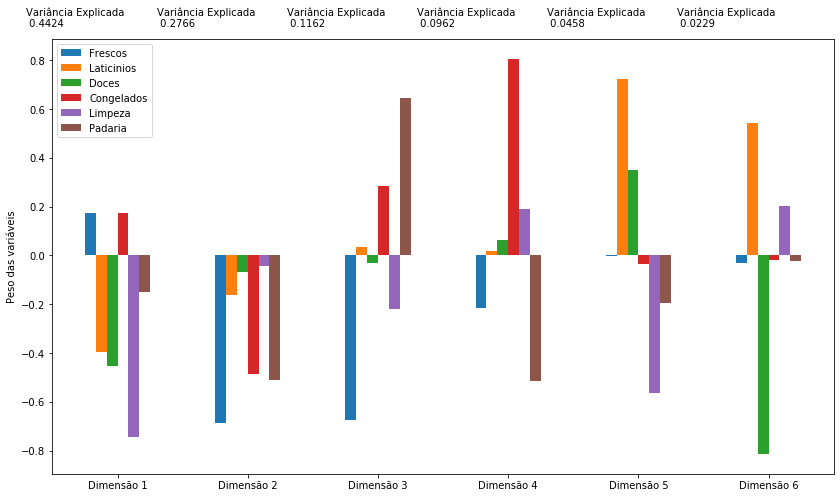

In [116]:
### CHAME A FUNÇÃO NOS DADOS TRANSFORMADOS ###
demonstracao_pca(df_log, 6)

__7)__ Instancie o `PCA` com 2 componentes através do parâmetro `n_components`  e use a função `fit` passando o dataframe para extraír os 2 componentes principais.

Após isso, utilize a função `transform` de `pca` passando `df_log` novamente. Será construído um novo dataframe contendo 2 dimensões (os dois componentes principais extraídos) 

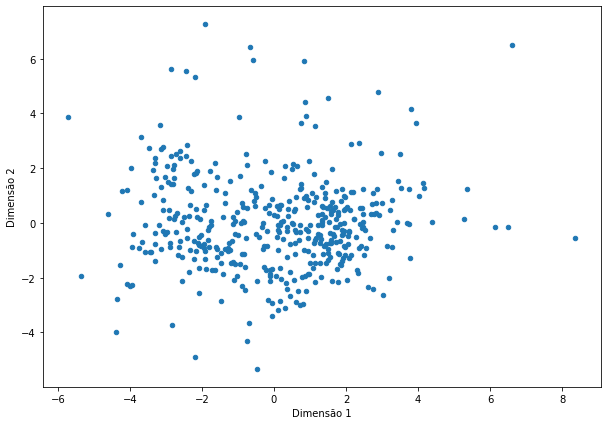

In [129]:
pca = PCA(n_components=2).fit(df_log)  ### INSTANCIE O PCA E USE O MÉTODO FIT NOS DADOS DE LOG ###
dados_reduzidos = pca.transform(df_log) ### TRANSFORME OS DADOS USANDO O MÉTODO TRANSFORM ###
dados_reduzidos = pd.DataFrame(dados_reduzidos, columns=['Dimensão 1', 'Dimensão 2'])
graph = dados_reduzidos.plot.scatter(x='Dimensão 1', y='Dimensão 2', figsize=(10,7))

## DBSCAN

__8)__ A função `DBSCAN_Clusters` recebe o dataframe reduzido, uma lista contendo valores para epsilon e um valor para  min_samples, e plota as clusterizações do DBSCAN para todas as combinações de hiperparâmetros. A função suporta plotar apenas 4 combinações, ou seja, é possível passar __por função__ 4 valores de epsilon e 1 de min_samples.

Defina até 4 valores de epsilon além de uma lista contendo valores para min_sample e procure a combinação de valores que melhor segmenta os dados separando observações que você considera normais e as que você considera outliers.


    



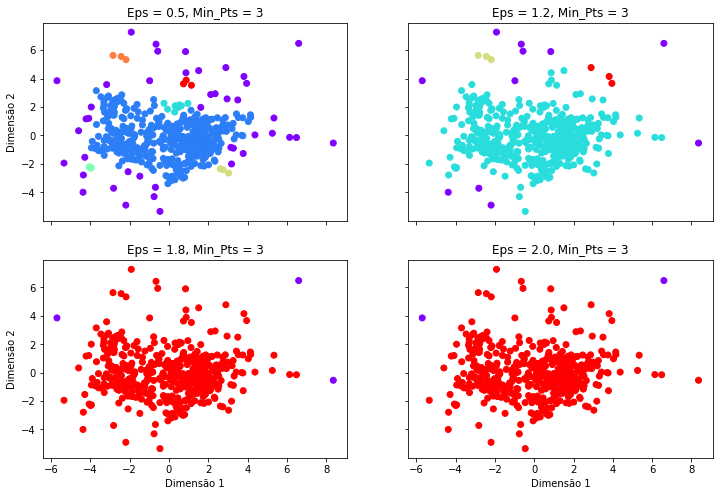

In [130]:
valores_epsilon = [ 0.5, 1.2, 1.8, 2.0 ] ### DEFINA UMA LISTA COM ATÉ 4 VALORES DE EPSILON ###
valores_min_sample = [ 3 ] ### DEFINA UMA LISTA COM VALORES DE MIN_SAMPLE - QUANTO MAIS VALORES, MAIS TEMPO PROCESSANDO ###

for min_sample in valores_min_sample:
    DBSCAN_Clusters(dados_reduzidos, valores_epsilon, min_sample)

__9)__ Usando a combinação mais apropriada de epsilon e min_samples, faça manualmente a clusterização utilizando esses parâmetros. O cluster de cada registro será acrescentado ao dataframe `dados_reduzidos` como uma nova coluna __status__.

In [131]:
### INSTANCIE O MODELO PASSANDO OS PARÂMETROS ###.fit_predict(dados_reduzidos).fit_predict(dados_reduzidos)
clusters = DBSCAN(eps=1.8, metric='euclidean', min_samples=3, n_jobs=-1).fit_predict(dados_reduzidos)
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [133]:
dados_reduzidos
dados_reduzidos['status'] = ['Outlier' if cluster == -1 else 'Normal' for cluster in clusters]
dados_reduzidos.groupby('status').nunique()

,Dimensão 1,Dimensão 2,status
status,,,
Normal,437,437,1
Outlier,3,3,1


__10)__ Crie dois novos dataframes, `dataset_limpo` e `dataset_outliers`. O primeiro contem os registros considerados normais, e o segundo contem os registros considerados anômalos.

In [86]:
dataset_limpo = dados_reduzidos[dados_reduzidos['status'] == 'Normal'] ### DADOS REDUZIDOS COM STATUS 'Normal' ###
dataset_outliers = dados_reduzidos[dados_reduzidos['status'] == 'Outlier'] ### DADOS REDUZIDOS COM STATUS 'Outlier' ###

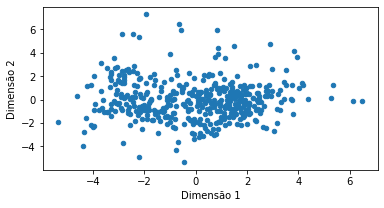

In [87]:
### EXECUTE ESSA CÉLULA PARA PLOTAR A DISTRIBUIÇÃO ###
graph = dataset_limpo.plot.scatter(
          x = "Dimensão 1",
          y = "Dimensão 2",
          figsize=(6,3)
        )

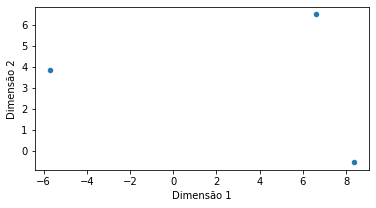

In [88]:
### EXECUTE ESSA CÉLULA PARA PLOTAR A DISTRIBUIÇÃO ###
graph = dataset_outliers.plot.scatter(
          x = "Dimensão 1",
          y = "Dimensão 2",
          figsize=(6,3)
        )

__11)__ Quem são os outliers?

Quando fazemos transformações nos dataframes, atrbuindo a novas variáveis versões transformadas de um dataframe original (`df` no nosso caso), o index dos registros se mantem inalterado a menos que usemos uma função tal como `DataFrame.reset_index()`. Ou seja, os registros tanto do dataset de valores normais quanto os registros do dataset de outliers ainda possuem o index do dataframe original. Exiba no dataframe original os registros que foram posteriormente classificados como outliers.

DICA: podemos extrair o index dos registros de um dataframe simplesmente chamando o atributo `index` do dataframe

In [103]:
outliers_original = df.iloc[dataset_outliers.index] ### REGISTROS DO DATAFRAME ORIGINAL CONSIDERADOS OUTLIERS ###
outliers_original

,Frescos,Laticinios,Doces,Congelados,Limpeza,Padaria
65,85,20959,45828,36,24231,1423
75,20398,1137,3,4407,3,975
154,622,55,137,75,7,8


__12)__ Retorne um novo dataframe a partir de `outliers_original` contendo os z-scores desses registros (lembrando que o z-score é computado por coluna e não por registro, ou seja, o dataframe criado tem as mesmas dimensões do dataframe outliers_original)

In [109]:
describe = outliers_original.describe() ### CHAME A FUNÇÃO DESCRIBE() DO DATAFRAME ORIGINAL ###
describe
# Armazena as linhas 'std' e 'mean' do dataframe describe como arrays numpy, que suportam operações com vetores e álgebra linear
std = np.round(describe.loc['std'], 2)
mean = np.round(describe.loc['mean'], 2)

### CRIE UMA FUNÇÃO computar_zscore QUE RECEBE x, mean e std, e retorna o Z-score ###

# Constrói o dataframe com os z-scores
# O conceito abaixo chama-se compreensão de dicionário, é semelhante a compreensão de lista
#pd.DataFrame({index:computar_zscore(outliers_original.loc[index], mean, std) for index in outliers_original.index}).T

__13)__ RESPONDA: Se fossemos analisar esses dado sem o PCA e DBSCAN, usando uma métrica como o z-score em cada coluna, teriamos indentificado esses registros como outliers?